# 5.2. Accelerating pure Python code with Numba and just-in-time compilation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
size = 400
iterations = 100

In [3]:
def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [4]:
m = mandelbrot_python(size, iterations)

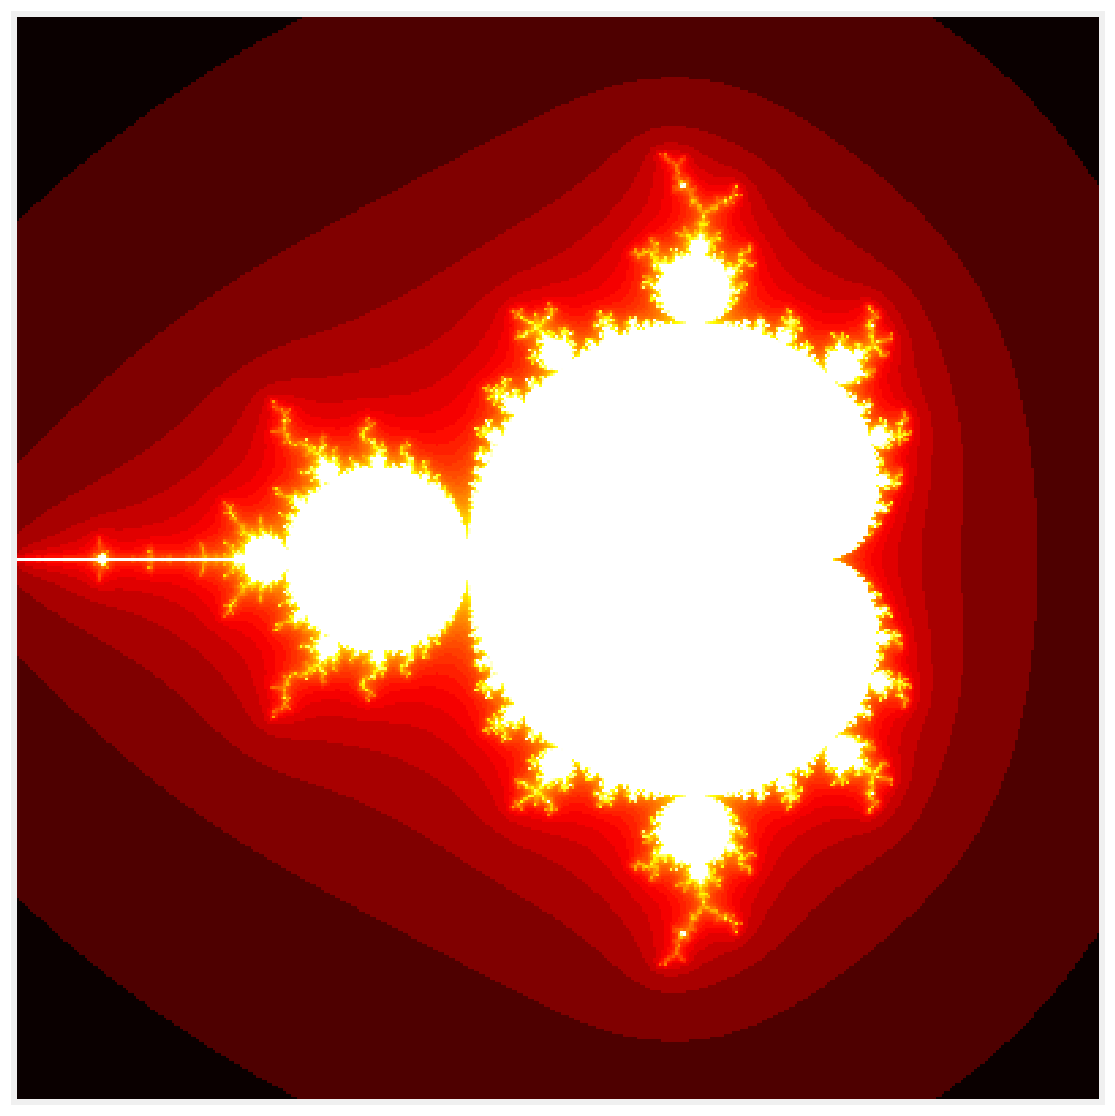

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

In [6]:
%timeit mandelbrot_python(size, iterations)

5.45 s ± 18.6 ms per loop (mean ± std. dev. of 7 runs,
    1 loop each)


In [7]:
from numba import jit

In [8]:
@jit
def mandelbrot_numba(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [9]:
mandelbrot_numba(size, iterations)

In [10]:
%timeit mandelbrot_numba(size, iterations)

34.5 ms ± 59.4 µs per loop (mean ± std. dev. of 7 runs,
    10 loops each)


In [11]:
def initialize(size):
    x, y = np.meshgrid(np.linspace(-2, 1, size),
                       np.linspace(-1.5, 1.5, size))
    c = x + 1j * y
    z = c.copy()
    m = np.zeros((size, size))
    return c, z, m

In [12]:
def mandelbrot_numpy(c, z, m, iterations):
    for n in range(iterations):
        indices = np.abs(z) <= 10
        z[indices] = z[indices] ** 2 + c[indices]
        m[indices] = n

In [13]:
%%timeit -n1 -r10 c, z, m = initialize(size)
mandelbrot_numpy(c, z, m, iterations)

174 ms ± 2.91 ms per loop (mean ± std. dev. of 10 runs,
    1 loop each)
